In [ ]:
import pandas as pd

PatientInfo = pd.read_csv('/Users/yunsujin/likelion_AI/데이터/archive (1) 2/PatientInfo.csv')
sex_contact_number = PatientInfo[['contact_number', 'sex']]

In [ ]:
# 결측치, 이상치 제거.

sex_contact_number = sex_contact_number.dropna()
idx = sex_contact_number[sex_contact_number['contact_number'] == '-'].index
sex_contact_number = sex_contact_number.drop(idx)
sex_contact_number['contact_number'] = sex_contact_number['contact_number'].astype(int)
index_big = sex_contact_number[sex_contact_number['contact_number'] >= 200].index
sex_contact_number = sex_contact_number.drop(index_big)
sex_contact_number = sex_contact_number.reset_index(drop = True)

In [ ]:
# 성별끼리 그룹으로 묶어 평균과 누적합 도출.

group = sex_contact_number.groupby('sex')
mean_contact = group.mean()
sum_contact = group.sum()
mean_contact

,contact_number
sex,
female,10.629977
male,13.958824


In [ ]:
sum_contact

,contact_number
sex,
female,4539
male,4746


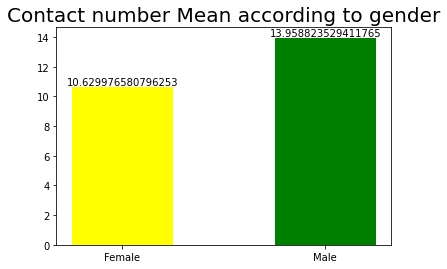

In [ ]:
# 바 그래프로 성별 평균 접촉자수 시각화

import matplotlib.pyplot as plt
x = ['Female', 'Male']
y = mean_contact['contact_number']
plt.bar(x, y, color = ['yellow', 'green'], align = 'center', width = 0.5)
plt.title("Contact number Mean according to gender", size = 20)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

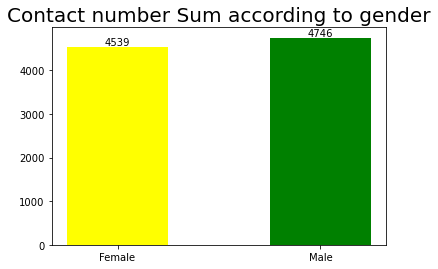

In [ ]:
# 바 그래프로 성별 누적합 접촉자수 시각화

x = ['Female', 'Male']
y = sum_contact['contact_number']
plt.bar(x, y, color = ['yellow', 'green'], align = 'center', width = 0.5)
plt.title("Contact number Sum according to gender", size = 20)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()